In [2]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [24]:
input_path = "C:\\Users\\krrah\\Downloads\\Dewinter2023\\Final_yolov5x\\cropped_images8\\final_image25.jpg"

In [25]:
img = cv2.imread(input_path)

In [33]:
#Function to calculate wbc cell area and perimeter
def extract_cell_param(image):
    # Extract cell size
    # Implement your code to measure the size of the cell
    image_copy = image.copy()
    # Convert image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    plt.subplot(121);plt.imshow(gray)
    
    # Perform image processing operations to segment the cell
    # Example: Thresholding to segment the cell
    _, binary = cv2.threshold(gray, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    #plt.subplot(122);plt.imshow(binary)
    # Find contours of the cell
    contours, _ = cv2.findContours(binary, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    #cv2.drawContours(image_copy, contours, -1, (0, 255, 0), 2)
    #plt.imshow(image_copy)
    
    # Calculate cell size (area) of the largest contour
    if len(contours) > 0:
        areas = [cv2.contourArea(contour) for contour in contours]
        perimeters = [cv2.arcLength(contour, True) for contour in contours]
        cell_area = max(areas)
        cell_perimeter = max(perimeters)
    else:
        return 0.0, 0.0
    
    return cell_area, cell_perimeter


(144693.5, 2270.4133368730545)


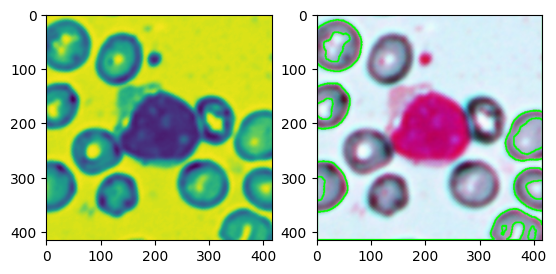

In [34]:
print(extract_cell_param(img))

In [ ]:
import cv2
import numpy as np
def select_center_pink_region(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)   
    # Define lower and upper pink color thresholds
    lower_pink = np.array([150, 50, 50])
    upper_pink = np.array([180, 255, 255])    
    # Create a mask for the pink region using the color thresholds
    mask = cv2.inRange(hsv, lower_pink, upper_pink)  
    # Find contours in the mask
    contours, _ = cv2.findContours(mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)   
    # Find the center contour based on a specific criterion
    center_contour = find_center_contour(contours)    
    # Create a mask for the center pink region
    center_mask = np.zeros_like(mask)
    cv2.drawContours(center_mask, [center_contour], 0, 255, -1) 
    # Apply the center mask to the original image to extract the center pink region
    center_pink_region = cv2.bitwise_and(image, image, mask=center_mask)
    return center_pink_region
def find_center_contour(contours):
    # Find the center contour based on a specific criterion
    # In this example, we assume the center contour is the contour with the largest area
    areas = [cv2.contourArea(contour) for contour in contours]
    max_area_idx = np.argmax(areas)
    center_contour = contours[max_area_idx]
    return center_contour

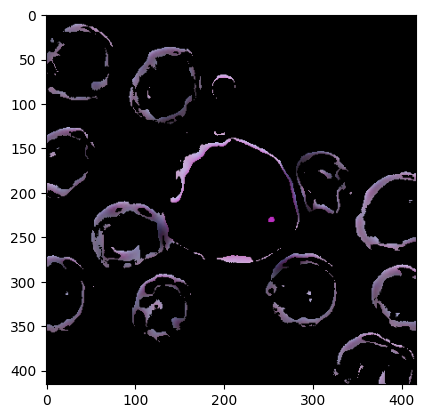

In [35]:

def select_pink_region(image):
    # Convert image to HSV color space
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    
    # Define lower and upper pink color thresholds
    lower_pink = np.array([150, 50, 50])
    upper_pink = np.array([180, 255, 255])
    
    # Create a mask for the pink region using the color thresholds
    mask = cv2.inRange(hsv, lower_pink, upper_pink)
    
    # Apply the mask to the original image to extract the pink region
    pink_region = cv2.bitwise_and(image, image, mask=mask)
    
    return pink_region
plt.imshow(select_pink_region(img))

In [28]:
#Function to calculate wbc nucleus area and perimeter
def extract_nucleus_characteristic(image):
# converting BGR into LAB colorspace
    lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)
    img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)

    # Define the lower and upper bounds for the green color in the HSV color space
    lower_green = np.array([40, 130, 170])
    upper_green = np.array([90, 255, 255])

    # Threshold the HSV image based on the color range
    img_mask = cv2.inRange(img_hsv, lower_green, upper_green)
    plt.imshow(img_mask)
    # Find contours in the thresholded image
    contours, _ = cv2.findContours(img_mask, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Check if any contours were found
    if len(contours) > 0:
        # Find the largest contour
        largest_contour = max(contours, key=cv2.contourArea)
        
        # Calculate the area and perimeter of the largest contour
        area = cv2.contourArea(largest_contour)
        perimeter = cv2.arcLength(largest_contour, True)

        return area, perimeter

    else:
        return 0, 0

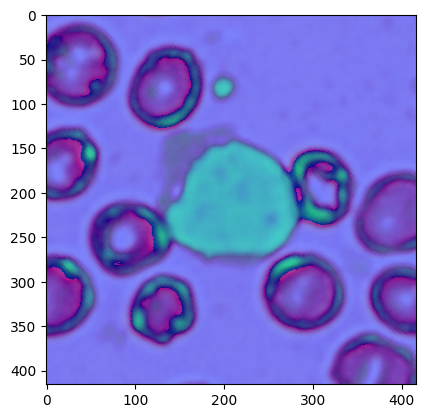

In [32]:
lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)
img_hsv = cv2.cvtColor(lab, cv2.COLOR_BGR2HSV)
plt.imshow(img_hsv)

(13600.5, 458.03152573108673)


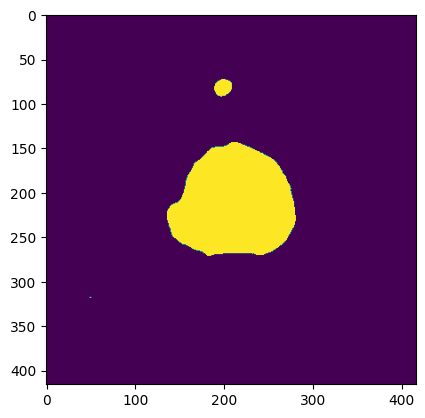

In [29]:
print(extract_nucleus_characteristic(img))

In [30]:
def cytoplasm_nucleus_area_ratio(image):
    area_cyto, _ = extract_cell_param(image)
    area_nucleus, _ = extract_nucleus_characteristic(image)
    ratio = area_cyto/area_nucleus
    return ratio

10.638836807470314


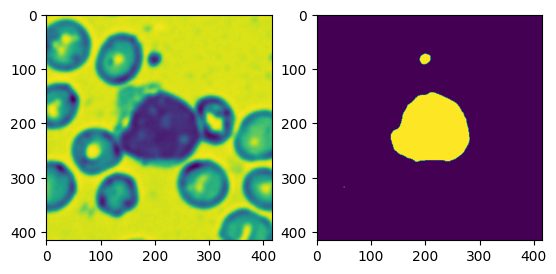

In [31]:
print(cytoplasm_nucleus_area_ratio(img))